# Unraveling causal structure

The goal of this notebook is to figure out why in some cases random graphs do not generate similar causal structures for the driver-node. 

In [29]:
# load modules and datasets
%load_ext autoreload
import numpy as np, sys, os, holoviews as hv, scipy
sys.path.insert(0, '../') # add normal modules
from Utils import IO, plotting as plotz, stats
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-notebook')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
root = '../Data/new1/'
data = IO.DataLoader(root)
data = {os.path.join(root, k): v for k,v in data.items()}
settings = IO.loadSets(data)




  0%|          | 0/21 [00:00<?, ?it/s]

Extracting data...
Done
Reading settings in ../Data/new1/2019-07-03T18:11:36.681371: using json
loading graph





  5%|▍         | 1/21 [00:00<00:05,  3.85it/s]


 24%|██▍       | 5/21 [00:00<00:02,  6.94it/s]


 33%|███▎      | 7/21 [00:00<00:01, 10.43it/s]


 33%|███▎      | 7/21 [00:00<00:01, 10.43it/s]


 33%|███▎      | 7/21 [00:00<00:01, 10.43it/s]


 33%|███▎      | 7/21 [00:00<00:01, 10.43it/s]


 33%|███▎      | 7/21 [00:00<00:01, 10.43it/s]


 43%|████▎     | 9/21 [00:00<00:01,  7.15it/s]


 52%|█████▏    | 11/21 [00:01<00:01,  6.61it/s]


 62%|██████▏   | 13/21 [00:01<00:01,  7.15it/s]


 71%|███████▏  | 15/21 [00:01<00:01,  5.75it/s]


 71%|███████▏  | 15/21 [00:01<00:01,  5.75it/s]


 76%|███████▌  | 16/21 [00:01<00:01,  4.87it/s]


 81%|████████  | 17/21 [00:01<00:00,  4.30it/s]


 95%|█████████▌| 20/21 [00:01<00:00,  6.78it/s]


 95%|█████████▌| 20/21 [00:01<00:00,  6.78it/s]


 95%|█████████▌| 20/21 [00:01<00:00,  6.78it/s]


 95%|█████████▌| 20/21 [00:01<00:00,  6.78it/s]


100%|██████████| 21/21 [00:02<00:00,  4.74it/s]


  0%|          | 0/21 [00:00<?, ?it/s]




Reading settings in ../Data/new1/2019-07-03T18:16:29.661423: using json
loading graph


 14%|█▍        | 3/21 [00:00<00:02,  7.27it/s]


 33%|███▎      | 7/21 [00:00<00:00, 14.19it/s]


 33%|███▎      | 7/21 [00:00<00:00, 14.19it/s]


 33%|███▎      | 7/21 [00:00<00:00, 14.19it/s]


 33%|███▎      | 7/21 [00:00<00:00, 14.19it/s]


 33%|███▎      | 7/21 [00:00<00:00, 14.19it/s]


 38%|███▊      | 8/21 [00:00<00:00, 14.19it/s]


 48%|████▊     | 10/21 [00:00<00:01,  6.68it/s]


 71%|███████▏  | 15/21 [00:01<00:00, 11.88it/s]


 81%|████████  | 17/21 [00:01<00:00, 13.61it/s]


 81%|████████  | 17/21 [00:01<00:00, 13.61it/s]


 86%|████████▌ | 18/21 [00:01<00:00, 13.61it/s]


100%|██████████| 21/21 [00:01<00:00,  8.95it/s]


  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T18:20:26.303506: using json
loading graph





 14%|█▍        | 3/21 [00:00<00:04,  4.48it/s]


 29%|██▊       | 6/21 [00:00<00:01,  8.01it/s]


 33%|███▎      | 7/21 [00:00<00:02,  6.30it/s]


 38%|███▊      | 8/21 [00:00<00:02,  4.36it/s]


 38%|███▊      | 8/21 [00:00<00:02,  4.36it/s]


 38%|███▊      | 8/21 [00:00<00:02,  4.36it/s]


 38%|███▊      | 8/21 [00:01<00:02,  4.36it/s]


 43%|████▎     | 9/21 [00:01<00:03,  3.18it/s]


 48%|████▊     | 10/21 [00:01<00:03,  3.33it/s]


 48%|████▊     | 10/21 [00:01<00:03,  3.33it/s]


 52%|█████▏    | 11/21 [00:01<00:02,  3.67it/s]


 57%|█████▋    | 12/21 [00:01<00:02,  3.98it/s]


 62%|██████▏   | 13/21 [00:01<00:01,  4.72it/s]


 71%|███████▏  | 15/21 [00:01<00:01,  5.88it/s]


 71%|███████▏  | 15/21 [00:01<00:01,  5.88it/s]


 86%|████████▌ | 18/21 [00:01<00:00,  6.71it/s]


 90%|█████████ | 19/21 [00:02<00:00,  6.71it/s]


 95%|█████████▌| 20/21 [00:02<00:00,  5.64it/s]


100%|██████████| 21/21 [00:02<00:00,  6.03it/s]


  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T18:25:42.054198: using json
loading graph





 10%|▉         | 2/21 [00:00<00:03,  5.44it/s]


 33%|███▎      | 7/21 [00:00<00:01, 11.75it/s]


 33%|███▎      | 7/21 [00:00<00:01, 11.75it/s]


 33%|███▎      | 7/21 [00:00<00:01, 11.75it/s]


 33%|███▎      | 7/21 [00:00<00:01, 11.75it/s]


 43%|████▎     | 9/21 [00:00<00:02,  5.45it/s]


 48%|████▊     | 10/21 [00:00<00:02,  5.45it/s]


 52%|█████▏    | 11/21 [00:00<00:01,  5.45it/s]


 67%|██████▋   | 14/21 [00:01<00:01,  4.63it/s]


 90%|█████████ | 19/21 [00:01<00:00,  7.88it/s]


 95%|█████████▌| 20/21 [00:01<00:00,  9.19it/s]


 95%|█████████▌| 20/21 [00:01<00:00,  9.19it/s]


100%|██████████| 21/21 [00:01<00:00,  7.58it/s]


100%|██████████| 21/21 [00:01<00:00,  7.58it/s]


100%|██████████| 21/21 [00:01<00:00,  7.58it/s]


100%|██████████| 21/21 [00:01<00:00,  7.58it/s]


100%|██████████| 21/21 [00:01<00:00,  7.58it/s]



  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T18:28:41.276495: using json
loading graph






  5%|▍         | 1/21 [00:00<00:07,  2.54it/s]



 33%|███▎      | 7/21 [00:00<00:02,  6.43it/s]



 33%|███▎      | 7/21 [00:00<00:02,  6.43it/s]



 33%|███▎      | 7/21 [00:00<00:02,  6.43it/s]



 33%|███▎      | 7/21 [00:00<00:02,  6.43it/s]



 33%|███▎      | 7/21 [00:00<00:02,  6.43it/s]



 33%|███▎      | 7/21 [00:00<00:02,  6.43it/s]



 38%|███▊      | 8/21 [00:01<00:03,  3.82it/s]



 43%|████▎     | 9/21 [00:01<00:02,  4.27it/s]



 52%|█████▏    | 11/21 [00:01<00:01,  5.93it/s]



 57%|█████▋    | 12/21 [00:01<00:01,  6.88it/s]



 67%|██████▋   | 14/21 [00:01<00:01,  6.01it/s]



 67%|██████▋   | 14/21 [00:01<00:01,  6.01it/s]



 71%|███████▏  | 15/21 [00:01<00:01,  4.61it/s]



 71%|███████▏  | 15/21 [00:01<00:01,  4.61it/s]



 76%|███████▌  | 16/21 [00:02<00:01,  4.36it/s]



 86%|████████▌ | 18/21 [00:02<00:00,  5.60it/s]



 95%|█████████▌| 20/21 [00:02<00:00,  5.65it/s]



 95%|█████████▌| 20/21 [00:02<00:00,  5.65it/s]



100%|██████████| 21/21 [00:02<00:00,

Reading settings in ../Data/new1/2019-07-03T18:35:20.162767: using json
loading graph






  5%|▍         | 1/21 [00:00<00:06,  2.87it/s]



 29%|██▊       | 6/21 [00:00<00:02,  6.95it/s]



 33%|███▎      | 7/21 [00:00<00:02,  6.46it/s]



 33%|███▎      | 7/21 [00:00<00:02,  6.46it/s]



 33%|███▎      | 7/21 [00:00<00:02,  6.46it/s]



 33%|███▎      | 7/21 [00:00<00:02,  6.46it/s]



 33%|███▎      | 7/21 [00:00<00:02,  6.46it/s]



 38%|███▊      | 8/21 [00:01<00:03,  3.86it/s]



 43%|████▎     | 9/21 [00:01<00:02,  4.66it/s]



 52%|█████▏    | 11/21 [00:01<00:01,  6.97it/s]



 57%|█████▋    | 12/21 [00:01<00:01,  6.76it/s]



 62%|██████▏   | 13/21 [00:01<00:01,  7.84it/s]



 67%|██████▋   | 14/21 [00:01<00:00,  7.84it/s]



 76%|███████▌  | 16/21 [00:01<00:00,  6.38it/s]



 81%|████████  | 17/21 [00:01<00:00,  6.19it/s]



 95%|█████████▌| 20/21 [00:02<00:00,  8.26it/s]



 95%|█████████▌| 20/21 [00:02<00:00,  8.26it/s]



 95%|█████████▌| 20/21 [00:02<00:00,  8.26it/s]



100%|██████████| 21/21 [00:02<00:00,  8.09it/s]



  0%|          | 0/21 [00:00<?, ?it/

Reading settings in ../Data/new1/2019-07-03T18:41:26.199107: using json
loading graph






  5%|▍         | 1/21 [00:00<00:04,  4.83it/s]



 29%|██▊       | 6/21 [00:00<00:01,  8.52it/s]



 33%|███▎      | 7/21 [00:00<00:01, 10.83it/s]



 33%|███▎      | 7/21 [00:00<00:01, 10.83it/s]



 43%|████▎     | 9/21 [00:00<00:01, 10.31it/s]



 57%|█████▋    | 12/21 [00:00<00:00, 10.23it/s]



 57%|█████▋    | 12/21 [00:00<00:00, 10.23it/s]



 67%|██████▋   | 14/21 [00:01<00:00, 10.89it/s]



 81%|████████  | 17/21 [00:01<00:00,  9.14it/s]



 90%|█████████ | 19/21 [00:01<00:00,  9.91it/s]



 95%|█████████▌| 20/21 [00:01<00:00, 10.43it/s]



100%|██████████| 21/21 [00:01<00:00, 12.36it/s]



  0%|          | 0/21 [00:00<?, ?it/s]



  5%|▍         | 1/21 [00:00<00:03,  6.28it/s]

Reading settings in ../Data/new1/2019-07-03T18:45:09.667248: using json
loading graph






 10%|▉         | 2/21 [00:00<00:02,  6.89it/s]



 19%|█▉        | 4/21 [00:00<00:02,  8.48it/s]



 33%|███▎      | 7/21 [00:00<00:01, 13.79it/s]



 33%|███▎      | 7/21 [00:00<00:01, 13.79it/s]



 33%|███▎      | 7/21 [00:00<00:01, 13.79it/s]



 48%|████▊     | 10/21 [00:00<00:00, 11.54it/s]



 48%|████▊     | 10/21 [00:00<00:00, 11.54it/s]



 62%|██████▏   | 13/21 [00:01<00:00,  9.03it/s]



 71%|███████▏  | 15/21 [00:01<00:00,  9.34it/s]



 76%|███████▌  | 16/21 [00:01<00:00,  9.34it/s]



 95%|█████████▌| 20/21 [00:01<00:00,  7.45it/s]



 95%|█████████▌| 20/21 [00:01<00:00,  7.45it/s]



100%|██████████| 21/21 [00:01<00:00,  6.72it/s]



  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T18:49:08.629478: using json
loading graph






 10%|▉         | 2/21 [00:00<00:06,  2.88it/s]



 14%|█▍        | 3/21 [00:00<00:05,  3.48it/s]



 33%|███▎      | 7/21 [00:00<00:01,  7.09it/s]



 33%|███▎      | 7/21 [00:00<00:01,  7.09it/s]



 33%|███▎      | 7/21 [00:00<00:01,  7.09it/s]



 33%|███▎      | 7/21 [00:00<00:01,  7.09it/s]



 33%|███▎      | 7/21 [00:00<00:01,  7.09it/s]



 43%|████▎     | 9/21 [00:01<00:02,  4.54it/s]



 57%|█████▋    | 12/21 [00:01<00:01,  4.76it/s]



 67%|██████▋   | 14/21 [00:01<00:00,  7.19it/s]



 67%|██████▋   | 14/21 [00:01<00:00,  7.19it/s]



 67%|██████▋   | 14/21 [00:01<00:00,  7.19it/s]



 71%|███████▏  | 15/21 [00:01<00:01,  4.84it/s]



 71%|███████▏  | 15/21 [00:02<00:01,  4.84it/s]



 76%|███████▌  | 16/21 [00:02<00:01,  3.80it/s]



 81%|████████  | 17/21 [00:02<00:00,  4.56it/s]



 86%|████████▌ | 18/21 [00:02<00:00,  5.75it/s]



 90%|█████████ | 19/21 [00:02<00:00,  6.46it/s]



 95%|█████████▌| 20/21 [00:02<00:00,  5.85it/s]



100%|██████████| 21/21 [00:03<00:00

Reading settings in ../Data/new1/2019-07-03T18:56:58.469043: using json
loading graph







 14%|█▍        | 3/21 [00:00<00:03,  4.98it/s]




 33%|███▎      | 7/21 [00:00<00:01,  8.02it/s]




 33%|███▎      | 7/21 [00:00<00:01,  8.02it/s]




 33%|███▎      | 7/21 [00:00<00:01,  8.02it/s]




 33%|███▎      | 7/21 [00:00<00:01,  8.02it/s]




 33%|███▎      | 7/21 [00:00<00:01,  8.02it/s]




 38%|███▊      | 8/21 [00:00<00:02,  4.90it/s]




 43%|████▎     | 9/21 [00:00<00:02,  4.68it/s]




 43%|████▎     | 9/21 [00:00<00:02,  4.68it/s]




 52%|█████▏    | 11/21 [00:01<00:01,  5.03it/s]




 52%|█████▏    | 11/21 [00:01<00:01,  5.03it/s]




 62%|██████▏   | 13/21 [00:01<00:01,  4.66it/s]




 62%|██████▏   | 13/21 [00:01<00:01,  4.66it/s]




 67%|██████▋   | 14/21 [00:01<00:01,  4.76it/s]




 76%|███████▌  | 16/21 [00:01<00:00,  6.48it/s]




 81%|████████  | 17/21 [00:01<00:00,  6.44it/s]




 86%|████████▌ | 18/21 [00:01<00:00,  5.80it/s]




 90%|█████████ | 19/21 [00:01<00:00,  4.73it/s]




 95%|█████████▌| 20/21 [00:02<00:00,  4.35it/s]




100%|██████████|

Reading settings in ../Data/new1/2019-07-03T19:01:38.901002: using json
loading graph







 19%|█▉        | 4/21 [00:00<00:02,  6.34it/s]




 33%|███▎      | 7/21 [00:00<00:01, 12.01it/s]




 33%|███▎      | 7/21 [00:00<00:01, 12.01it/s]




 33%|███▎      | 7/21 [00:00<00:01, 12.01it/s]




 48%|████▊     | 10/21 [00:00<00:01,  8.17it/s]




 57%|█████▋    | 12/21 [00:00<00:01,  8.84it/s]




 71%|███████▏  | 15/21 [00:01<00:00,  9.66it/s]




 76%|███████▌  | 16/21 [00:01<00:00, 11.02it/s]




 86%|████████▌ | 18/21 [00:01<00:00, 10.64it/s]




 95%|█████████▌| 20/21 [00:01<00:00, 12.65it/s]




 95%|█████████▌| 20/21 [00:01<00:00, 12.65it/s]




100%|██████████| 21/21 [00:01<00:00, 12.55it/s]




  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T19:05:13.717362: using json
loading graph







  5%|▍         | 1/21 [00:00<00:04,  4.51it/s]




 10%|▉         | 2/21 [00:00<00:03,  5.17it/s]




 33%|███▎      | 7/21 [00:00<00:01, 11.79it/s]




 33%|███▎      | 7/21 [00:00<00:01, 11.79it/s]




 33%|███▎      | 7/21 [00:00<00:01, 11.79it/s]




 48%|████▊     | 10/21 [00:00<00:01, 10.24it/s]




 52%|█████▏    | 11/21 [00:00<00:01,  9.91it/s]




 67%|██████▋   | 14/21 [00:01<00:00, 10.56it/s]




 67%|██████▋   | 14/21 [00:01<00:00, 10.56it/s]




 76%|███████▌  | 16/21 [00:01<00:00, 10.01it/s]




 86%|████████▌ | 18/21 [00:01<00:00, 11.03it/s]




 95%|█████████▌| 20/21 [00:01<00:00, 10.94it/s]




100%|██████████| 21/21 [00:02<00:00, 10.36it/s]




  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T19:10:14.220083: using json
loading graph







  5%|▍         | 1/21 [00:00<00:06,  3.24it/s]




 24%|██▍       | 5/21 [00:00<00:04,  3.73it/s]




 33%|███▎      | 7/21 [00:00<00:02,  5.38it/s]




 33%|███▎      | 7/21 [00:00<00:02,  5.38it/s]




 43%|████▎     | 9/21 [00:00<00:02,  5.01it/s]




 52%|█████▏    | 11/21 [00:00<00:01,  5.01it/s]




 62%|██████▏   | 13/21 [00:01<00:01,  6.76it/s]




 67%|██████▋   | 14/21 [00:01<00:00,  7.22it/s]




 67%|██████▋   | 14/21 [00:01<00:00,  7.22it/s]




 71%|███████▏  | 15/21 [00:01<00:01,  5.47it/s]




 81%|████████  | 17/21 [00:01<00:00,  7.08it/s]




 90%|█████████ | 19/21 [00:01<00:00,  8.05it/s]




 90%|█████████ | 19/21 [00:01<00:00,  8.05it/s]




 95%|█████████▌| 20/21 [00:01<00:00,  8.05it/s]




100%|██████████| 21/21 [00:01<00:00,  5.32it/s]





  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T19:14:32.615618: using json
loading graph








  5%|▍         | 1/21 [00:00<00:05,  3.59it/s]





 24%|██▍       | 5/21 [00:00<00:02,  6.56it/s]





 33%|███▎      | 7/21 [00:00<00:01,  8.86it/s]





 33%|███▎      | 7/21 [00:00<00:01,  8.86it/s]





 33%|███▎      | 7/21 [00:00<00:01,  8.86it/s]





 33%|███▎      | 7/21 [00:00<00:01,  8.86it/s]





 33%|███▎      | 7/21 [00:00<00:01,  8.86it/s]





 43%|████▎     | 9/21 [00:01<00:02,  5.62it/s]





 57%|█████▋    | 12/21 [00:01<00:01,  5.82it/s]





 62%|██████▏   | 13/21 [00:01<00:01,  7.11it/s]





 67%|██████▋   | 14/21 [00:01<00:00,  7.13it/s]





 71%|███████▏  | 15/21 [00:01<00:01,  5.96it/s]





 71%|███████▏  | 15/21 [00:01<00:01,  5.96it/s]





 76%|███████▌  | 16/21 [00:01<00:01,  4.46it/s]





 81%|████████  | 17/21 [00:01<00:00,  4.63it/s]





 81%|████████  | 17/21 [00:01<00:00,  4.63it/s]





 86%|████████▌ | 18/21 [00:01<00:00,  4.92it/s]





 90%|█████████ | 19/21 [00:02<00:00,  5.55it/s]





 95%|█████████▌| 20/21 [00:02<00:00,  5.57it/s]


Reading settings in ../Data/new1/2019-07-03T19:19:54.788832: using json
loading graph








  5%|▍         | 1/21 [00:00<00:07,  2.83it/s]





 29%|██▊       | 6/21 [00:00<00:02,  6.89it/s]





 33%|███▎      | 7/21 [00:00<00:01,  8.35it/s]





 33%|███▎      | 7/21 [00:00<00:01,  8.35it/s]





 33%|███▎      | 7/21 [00:00<00:01,  8.35it/s]





 33%|███▎      | 7/21 [00:00<00:01,  8.35it/s]





 38%|███▊      | 8/21 [00:00<00:02,  4.98it/s]





 38%|███▊      | 8/21 [00:01<00:02,  4.98it/s]





 43%|████▎     | 9/21 [00:01<00:02,  4.40it/s]





 52%|█████▏    | 11/21 [00:01<00:01,  5.61it/s]





 62%|██████▏   | 13/21 [00:01<00:01,  7.11it/s]





 67%|██████▋   | 14/21 [00:01<00:00,  7.32it/s]





 67%|██████▋   | 14/21 [00:01<00:00,  7.32it/s]





 76%|███████▌  | 16/21 [00:01<00:00,  5.44it/s]





 81%|████████  | 17/21 [00:01<00:00,  5.61it/s]





 95%|█████████▌| 20/21 [00:02<00:00,  7.42it/s]





 95%|█████████▌| 20/21 [00:02<00:00,  7.42it/s]





100%|██████████| 21/21 [00:02<00:00,  4.44it/s]





  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T19:25:58.079080: using json
loading graph








 10%|▉         | 2/21 [00:00<00:06,  2.74it/s]





 19%|█▉        | 4/21 [00:00<00:04,  4.04it/s]





 29%|██▊       | 6/21 [00:00<00:02,  6.22it/s]





 29%|██▊       | 6/21 [00:00<00:02,  6.22it/s]





 33%|███▎      | 7/21 [00:00<00:02,  5.34it/s]





 33%|███▎      | 7/21 [00:00<00:02,  5.34it/s]





 33%|███▎      | 7/21 [00:00<00:02,  5.34it/s]





 38%|███▊      | 8/21 [00:01<00:03,  3.91it/s]





 43%|████▎     | 9/21 [00:01<00:02,  4.41it/s]





 48%|████▊     | 10/21 [00:01<00:02,  5.20it/s]





 57%|█████▋    | 12/21 [00:01<00:01,  6.57it/s]





 57%|█████▋    | 12/21 [00:01<00:01,  6.57it/s]





 67%|██████▋   | 14/21 [00:01<00:01,  5.73it/s]





 71%|███████▏  | 15/21 [00:01<00:01,  5.91it/s]





 71%|███████▏  | 15/21 [00:01<00:01,  5.91it/s]





 76%|███████▌  | 16/21 [00:02<00:00,  5.38it/s]





 81%|████████  | 17/21 [00:02<00:00,  5.86it/s]





 86%|████████▌ | 18/21 [00:02<00:00,  6.81it/s]





 90%|█████████ | 19/21 [00:02<00:00,  6.81it/s]



Reading settings in ../Data/new1/2019-07-03T19:32:45.814575: using json
loading graph








  5%|▍         | 1/21 [00:00<00:04,  4.98it/s]





 29%|██▊       | 6/21 [00:00<00:01,  9.56it/s]





 33%|███▎      | 7/21 [00:00<00:01, 10.68it/s]





 33%|███▎      | 7/21 [00:00<00:01, 10.68it/s]





 33%|███▎      | 7/21 [00:00<00:01, 10.68it/s]





 38%|███▊      | 8/21 [00:00<00:01, 10.68it/s]





 43%|████▎     | 9/21 [00:00<00:01,  7.12it/s]





 48%|████▊     | 10/21 [00:00<00:01,  7.12it/s]





 52%|█████▏    | 11/21 [00:01<00:01,  6.08it/s]





 67%|██████▋   | 14/21 [00:01<00:00,  9.40it/s]





 71%|███████▏  | 15/21 [00:01<00:00,  9.40it/s]





 81%|████████  | 17/21 [00:01<00:00, 10.21it/s]





 86%|████████▌ | 18/21 [00:01<00:00, 10.21it/s]





 95%|█████████▌| 20/21 [00:01<00:00, 12.90it/s]





100%|██████████| 21/21 [00:01<00:00, 12.90it/s]





  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T19:36:05.641532: using json
loading graph








  5%|▍         | 1/21 [00:00<00:06,  2.97it/s]





 29%|██▊       | 6/21 [00:00<00:03,  4.10it/s]





 33%|███▎      | 7/21 [00:00<00:02,  5.55it/s]





 43%|████▎     | 9/21 [00:01<00:02,  4.97it/s]





 48%|████▊     | 10/21 [00:01<00:02,  5.08it/s]





 62%|██████▏   | 13/21 [00:01<00:01,  6.47it/s]





 71%|███████▏  | 15/21 [00:01<00:00,  6.73it/s]





 81%|████████  | 17/21 [00:01<00:00,  7.92it/s]





 90%|█████████ | 19/21 [00:01<00:00,  9.12it/s]





 95%|█████████▌| 20/21 [00:01<00:00, 10.86it/s]






  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T19:42:05.174696: using json
loading graph









  5%|▍         | 1/21 [00:00<00:05,  3.34it/s]






 10%|▉         | 2/21 [00:00<00:04,  3.84it/s]






 29%|██▊       | 6/21 [00:00<00:02,  7.13it/s]






 33%|███▎      | 7/21 [00:00<00:01,  7.62it/s]






 33%|███▎      | 7/21 [00:00<00:01,  7.62it/s]






 33%|███▎      | 7/21 [00:00<00:01,  7.62it/s]






 43%|████▎     | 9/21 [00:01<00:02,  4.16it/s]






 48%|████▊     | 10/21 [00:01<00:03,  3.18it/s]






 52%|█████▏    | 11/21 [00:01<00:03,  3.25it/s]






 52%|█████▏    | 11/21 [00:01<00:03,  3.25it/s]






 62%|██████▏   | 13/21 [00:01<00:01,  4.50it/s]






 71%|███████▏  | 15/21 [00:01<00:01,  5.51it/s]






 76%|███████▌  | 16/21 [00:01<00:00,  5.02it/s]






 76%|███████▌  | 16/21 [00:01<00:00,  5.02it/s]






 76%|███████▌  | 16/21 [00:01<00:00,  5.02it/s]






 86%|████████▌ | 18/21 [00:01<00:00,  5.54it/s]






 90%|█████████ | 19/21 [00:01<00:00,  6.39it/s]






 90%|█████████ | 19/21 [00:02<00:00,  6.39it/s]






 95%|█████████▌| 20/21 [00:0

Reading settings in ../Data/new1/2019-07-03T19:47:26.077991: using json
loading graph


  5%|▍         | 1/21 [00:00<00:03,  5.17it/s]






 19%|█▉        | 4/21 [00:00<00:02,  7.37it/s]






 33%|███▎      | 7/21 [00:00<00:01,  9.66it/s]






 33%|███▎      | 7/21 [00:00<00:01,  9.66it/s]






 33%|███▎      | 7/21 [00:00<00:01,  9.66it/s]






 38%|███▊      | 8/21 [00:00<00:01,  9.66it/s]






 48%|████▊     | 10/21 [00:00<00:01,  7.94it/s]






 57%|█████▋    | 12/21 [00:00<00:01,  7.73it/s]






 62%|██████▏   | 13/21 [00:01<00:01,  7.27it/s]






 76%|███████▌  | 16/21 [00:01<00:00,  9.39it/s]






 90%|█████████ | 19/21 [00:01<00:00, 11.71it/s]






100%|██████████| 21/21 [00:01<00:00,  8.47it/s]






  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T19:51:21.266868: using json
loading graph









 24%|██▍       | 5/21 [00:00<00:01,  8.67it/s]






 29%|██▊       | 6/21 [00:00<00:01, 10.34it/s]






 33%|███▎      | 7/21 [00:00<00:01,  8.72it/s]






 33%|███▎      | 7/21 [00:00<00:01,  8.72it/s]






 33%|███▎      | 7/21 [00:00<00:01,  8.72it/s]






 33%|███▎      | 7/21 [00:00<00:01,  8.72it/s]






 38%|███▊      | 8/21 [00:00<00:01,  8.72it/s]






 48%|████▊     | 10/21 [00:00<00:01,  6.28it/s]






 57%|█████▋    | 12/21 [00:01<00:01,  6.91it/s]






 62%|██████▏   | 13/21 [00:01<00:01,  6.89it/s]






 67%|██████▋   | 14/21 [00:01<00:00,  7.95it/s]






 71%|███████▏  | 15/21 [00:01<00:00,  6.13it/s]






 81%|████████  | 17/21 [00:01<00:00,  7.12it/s]






 81%|████████  | 17/21 [00:01<00:00,  7.12it/s]






 86%|████████▌ | 18/21 [00:01<00:00,  5.85it/s]






 86%|████████▌ | 18/21 [00:01<00:00,  5.85it/s]






 90%|█████████ | 19/21 [00:01<00:00,  4.63it/s]






 95%|█████████▌| 20/21 [00:01<00:00,  4.94it/s]






100%|██████████| 21/21 [00:0

Reading settings in ../Data/new1/2019-07-03T19:56:09.230436: using json
loading graph









 10%|▉         | 2/21 [00:00<00:06,  2.95it/s]






 19%|█▉        | 4/21 [00:00<00:03,  4.33it/s]






 33%|███▎      | 7/21 [00:00<00:01,  9.23it/s]






 33%|███▎      | 7/21 [00:00<00:01,  9.23it/s]






 33%|███▎      | 7/21 [00:00<00:01,  9.23it/s]






 33%|███▎      | 7/21 [00:00<00:01,  9.23it/s]






 33%|███▎      | 7/21 [00:00<00:01,  9.23it/s]






 43%|████▎     | 9/21 [00:01<00:02,  5.73it/s]






 52%|█████▏    | 11/21 [00:01<00:01,  5.15it/s]






 62%|██████▏   | 13/21 [00:01<00:01,  5.99it/s]






 76%|███████▌  | 16/21 [00:01<00:00,  5.74it/s]






 81%|████████  | 17/21 [00:02<00:00,  5.74it/s]






 90%|█████████ | 19/21 [00:02<00:00,  8.36it/s]






 95%|█████████▌| 20/21 [00:02<00:00,  6.18it/s]






 95%|█████████▌| 20/21 [00:02<00:00,  6.18it/s]






100%|██████████| 21/21 [00:02<00:00,  3.46it/s]







  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T20:03:35.083749: using json
loading graph










  5%|▍         | 1/21 [00:00<00:03,  5.10it/s]







 14%|█▍        | 3/21 [00:00<00:03,  5.84it/s]







 29%|██▊       | 6/21 [00:00<00:01,  7.55it/s]







 33%|███▎      | 7/21 [00:00<00:01,  9.23it/s]







 33%|███▎      | 7/21 [00:00<00:01,  9.23it/s]







 57%|█████▋    | 12/21 [00:00<00:01,  8.37it/s]







 62%|██████▏   | 13/21 [00:00<00:01,  7.88it/s]







 67%|██████▋   | 14/21 [00:01<00:00,  8.51it/s]







 67%|██████▋   | 14/21 [00:01<00:00,  8.51it/s]







 76%|███████▌  | 16/21 [00:01<00:00,  5.50it/s]







 76%|███████▌  | 16/21 [00:01<00:00,  5.50it/s]







 81%|████████  | 17/21 [00:01<00:01,  3.92it/s]







 81%|████████  | 17/21 [00:01<00:01,  3.92it/s]







 90%|█████████ | 19/21 [00:01<00:00,  3.04it/s]







 90%|█████████ | 19/21 [00:01<00:00,  3.04it/s]







 90%|█████████ | 19/21 [00:01<00:00,  3.04it/s]







 95%|█████████▌| 20/21 [00:01<00:00,  3.55it/s]







100%|██████████| 21/21 [00:01<00:00,  4.29it/s]







  0%|  

Reading settings in ../Data/new1/2019-07-03T20:07:50.126107: using json
loading graph










 10%|▉         | 2/21 [00:00<00:04,  3.95it/s]







 10%|▉         | 2/21 [00:00<00:04,  3.95it/s]







 19%|█▉        | 4/21 [00:00<00:03,  4.81it/s]







 33%|███▎      | 7/21 [00:00<00:01,  8.28it/s]







 33%|███▎      | 7/21 [00:00<00:01,  8.28it/s]







 33%|███▎      | 7/21 [00:00<00:01,  8.28it/s]







 33%|███▎      | 7/21 [00:00<00:01,  8.28it/s]







 52%|█████▏    | 11/21 [00:01<00:01,  5.75it/s]







 52%|█████▏    | 11/21 [00:01<00:01,  5.75it/s]







 57%|█████▋    | 12/21 [00:01<00:01,  5.80it/s]







 57%|█████▋    | 12/21 [00:01<00:01,  5.80it/s]







 62%|██████▏   | 13/21 [00:01<00:01,  5.49it/s]







 71%|███████▏  | 15/21 [00:01<00:00,  6.75it/s]







 76%|███████▌  | 16/21 [00:01<00:00,  5.74it/s]







 90%|█████████ | 19/21 [00:01<00:00,  6.22it/s]







 95%|█████████▌| 20/21 [00:02<00:00,  7.84it/s]







100%|██████████| 21/21 [00:02<00:00,  8.31it/s]







  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T20:13:53.561657: using json
loading graph










  5%|▍         | 1/21 [00:00<00:08,  2.32it/s]







 14%|█▍        | 3/21 [00:00<00:05,  3.28it/s]







 24%|██▍       | 5/21 [00:00<00:03,  4.35it/s]







 29%|██▊       | 6/21 [00:00<00:03,  4.72it/s]







 29%|██▊       | 6/21 [00:00<00:03,  4.72it/s]







 33%|███▎      | 7/21 [00:00<00:03,  4.40it/s]







 38%|███▊      | 8/21 [00:01<00:03,  3.58it/s]







 48%|████▊     | 10/21 [00:01<00:02,  4.67it/s]







 57%|█████▋    | 12/21 [00:01<00:01,  7.48it/s]







 57%|█████▋    | 12/21 [00:01<00:01,  7.48it/s]







 71%|███████▏  | 15/21 [00:01<00:00,  6.14it/s]







 90%|█████████ | 19/21 [00:02<00:00,  9.85it/s]







 90%|█████████ | 19/21 [00:02<00:00,  9.85it/s]







 95%|█████████▌| 20/21 [00:02<00:00,  9.85it/s]







100%|██████████| 21/21 [00:02<00:00,  7.13it/s]







  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T20:22:01.964875: using json
loading graph










  5%|▍         | 1/21 [00:00<00:04,  4.53it/s]







 24%|██▍       | 5/21 [00:00<00:03,  5.27it/s]







 29%|██▊       | 6/21 [00:00<00:02,  6.95it/s]







 33%|███▎      | 7/21 [00:00<00:02,  5.62it/s]







 43%|████▎     | 9/21 [00:00<00:02,  5.63it/s]







 52%|█████▏    | 11/21 [00:00<00:01,  7.75it/s]







 52%|█████▏    | 11/21 [00:00<00:01,  7.75it/s]







 62%|██████▏   | 13/21 [00:00<00:00,  9.08it/s]







 62%|██████▏   | 13/21 [00:01<00:00,  9.08it/s]







 67%|██████▋   | 14/21 [00:01<00:01,  6.29it/s]







 76%|███████▌  | 16/21 [00:01<00:00,  5.36it/s]







 81%|████████  | 17/21 [00:01<00:00,  5.04it/s]







 86%|████████▌ | 18/21 [00:01<00:00,  4.49it/s]







 86%|████████▌ | 18/21 [00:01<00:00,  4.49it/s]







 90%|█████████ | 19/21 [00:01<00:00,  4.85it/s]







 95%|█████████▌| 20/21 [00:01<00:00,  5.21it/s]







100%|██████████| 21/21 [00:01<00:00,  5.00it/s]







  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T20:26:07.119737: using json
loading graph










  5%|▍         | 1/21 [00:00<00:05,  3.45it/s]







 19%|█▉        | 4/21 [00:00<00:03,  4.78it/s]







 29%|██▊       | 6/21 [00:00<00:02,  5.26it/s]





100%|██████████| 21/21 [00:20<00:00, 10.86it/s]







 33%|███▎      | 7/21 [00:00<00:02,  4.91it/s]







 38%|███▊      | 8/21 [00:00<00:02,  4.93it/s]







 52%|█████▏    | 11/21 [00:00<00:02,  4.37it/s]







 52%|█████▏    | 11/21 [00:00<00:02,  4.37it/s]







 57%|█████▋    | 12/21 [00:01<00:02,  4.40it/s]







 57%|█████▋    | 12/21 [00:01<00:02,  4.40it/s]







 62%|██████▏   | 13/21 [00:01<00:02,  3.73it/s]







 62%|██████▏   | 13/21 [00:01<00:02,  3.73it/s]







 71%|███████▏  | 15/21 [00:01<00:01,  5.48it/s]







 76%|███████▌  | 16/21 [00:01<00:00,  6.76it/s]







 76%|███████▌  | 16/21 [00:01<00:00,  6.76it/s]







 86%|████████▌ | 18/21 [00:01<00:00,  4.65it/s]







 90%|█████████ | 19/21 [00:01<00:00,  5.12it/s]







 95%|█████████▌| 20/21 [00:01<00:00,  6.24it/s]







 95%|████

Reading settings in ../Data/new1/2019-07-03T20:31:27.079844: using json
loading graph











  5%|▍         | 1/21 [00:00<00:06,  2.91it/s]








 19%|█▉        | 4/21 [00:00<00:03,  4.95it/s]








 33%|███▎      | 7/21 [00:00<00:02,  5.70it/s]








 33%|███▎      | 7/21 [00:00<00:02,  5.70it/s]








 33%|███▎      | 7/21 [00:00<00:02,  5.70it/s]








 38%|███▊      | 8/21 [00:00<00:02,  4.37it/s]








 43%|████▎     | 9/21 [00:00<00:02,  4.53it/s]








 57%|█████▋    | 12/21 [00:01<00:01,  6.72it/s]








 62%|██████▏   | 13/21 [00:01<00:01,  6.99it/s]








 67%|██████▋   | 14/21 [00:01<00:01,  6.13it/s]








 67%|██████▋   | 14/21 [00:01<00:01,  6.13it/s]








 71%|███████▏  | 15/21 [00:01<00:01,  4.79it/s]








 76%|███████▌  | 16/21 [00:01<00:01,  4.01it/s]








 86%|████████▌ | 18/21 [00:01<00:00,  3.82it/s]








 86%|████████▌ | 18/21 [00:01<00:00,  3.82it/s]








 86%|████████▌ | 18/21 [00:01<00:00,  3.82it/s]








 95%|█████████▌| 20/21 [00:01<00:00,  4.29it/s]








 95%|█████████▌| 20/21 [00:01<00:00,  4.29it/s

Reading settings in ../Data/new1/2019-07-03T20:36:32.473359: using json
loading graph











  5%|▍         | 1/21 [00:00<00:04,  4.64it/s]








 33%|███▎      | 7/21 [00:00<00:01, 10.42it/s]








 33%|███▎      | 7/21 [00:00<00:01, 10.42it/s]








 33%|███▎      | 7/21 [00:00<00:01, 10.42it/s]








 33%|███▎      | 7/21 [00:00<00:01, 10.42it/s]








 38%|███▊      | 8/21 [00:00<00:02,  5.91it/s]








 43%|████▎     | 9/21 [00:00<00:02,  5.91it/s]








 52%|█████▏    | 11/21 [00:00<00:02,  4.99it/s]








 57%|█████▋    | 12/21 [00:00<00:02,  4.01it/s]








 57%|█████▋    | 12/21 [00:01<00:02,  4.01it/s]








 62%|██████▏   | 13/21 [00:01<00:01,  4.42it/s]








 76%|███████▌  | 16/21 [00:01<00:00,  6.38it/s]








 81%|████████  | 17/21 [00:01<00:00,  7.85it/s]








 86%|████████▌ | 18/21 [00:01<00:00,  6.60it/s]








 86%|████████▌ | 18/21 [00:01<00:00,  6.60it/s]








 95%|█████████▌| 20/21 [00:01<00:00,  8.25it/s]








100%|██████████| 21/21 [00:01<00:00,  9.97it/s]








100%|██████████| 21/21 [00:01<00:00,  9.97it/s

Reading settings in ../Data/new1/2019-07-03T20:40:14.276004: using json
loading graph











 14%|█▍        | 3/21 [00:00<00:02,  7.05it/s]








 14%|█▍        | 3/21 [00:00<00:02,  7.05it/s]








 33%|███▎      | 7/21 [00:00<00:00, 14.07it/s]








 33%|███▎      | 7/21 [00:00<00:00, 14.07it/s]








 33%|███▎      | 7/21 [00:00<00:00, 14.07it/s]








 38%|███▊      | 8/21 [00:00<00:00, 14.07it/s]








 38%|███▊      | 8/21 [00:00<00:00, 14.07it/s]








 52%|█████▏    | 11/21 [00:00<00:01,  7.25it/s]








 62%|██████▏   | 13/21 [00:01<00:01,  6.23it/s]








 67%|██████▋   | 14/21 [00:01<00:01,  6.23it/s]








 81%|████████  | 17/21 [00:01<00:00,  9.76it/s]








 81%|████████  | 17/21 [00:01<00:00,  9.76it/s]








 81%|████████  | 17/21 [00:01<00:00,  9.76it/s]








 90%|█████████ | 19/21 [00:01<00:00,  9.02it/s]








100%|██████████| 21/21 [00:01<00:00,  9.23it/s]








  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T20:44:01.139847: using json
loading graph











  5%|▍         | 1/21 [00:00<00:04,  4.08it/s]








 19%|█▉        | 4/21 [00:00<00:02,  7.03it/s]








 29%|██▊       | 6/21 [00:00<00:01, 11.12it/s]








 33%|███▎      | 7/21 [00:00<00:01,  8.25it/s]








 33%|███▎      | 7/21 [00:00<00:01,  8.25it/s]








 33%|███▎      | 7/21 [00:00<00:01,  8.25it/s]








 38%|███▊      | 8/21 [00:00<00:01,  8.25it/s]








 48%|████▊     | 10/21 [00:00<00:01,  6.70it/s]








 57%|█████▋    | 12/21 [00:00<00:01,  7.70it/s]








 62%|██████▏   | 13/21 [00:01<00:00,  9.17it/s]








 76%|███████▌  | 16/21 [00:01<00:00,  9.66it/s]








 90%|█████████ | 19/21 [00:01<00:00, 12.07it/s]








 90%|█████████ | 19/21 [00:01<00:00, 12.07it/s]








100%|██████████| 21/21 [00:01<00:00, 12.10it/s]








  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T20:47:51.981220: using json
loading graph











 14%|█▍        | 3/21 [00:00<00:03,  4.81it/s]








 33%|███▎      | 7/21 [00:00<00:01, 10.10it/s]








 33%|███▎      | 7/21 [00:00<00:01, 10.10it/s]








 33%|███▎      | 7/21 [00:00<00:01, 10.10it/s]








 33%|███▎      | 7/21 [00:00<00:01, 10.10it/s]








 38%|███▊      | 8/21 [00:00<00:03,  4.27it/s]








 43%|████▎     | 9/21 [00:01<00:03,  3.90it/s]








 43%|████▎     | 9/21 [00:01<00:03,  3.90it/s]








 48%|████▊     | 10/21 [00:01<00:02,  3.90it/s]








 52%|█████▏    | 11/21 [00:01<00:02,  3.59it/s]








 57%|█████▋    | 12/21 [00:01<00:02,  3.90it/s]








 62%|██████▏   | 13/21 [00:01<00:01,  4.55it/s]








 67%|██████▋   | 14/21 [00:01<00:01,  5.39it/s]








 71%|███████▏  | 15/21 [00:01<00:00,  6.56it/s]








 81%|████████  | 17/21 [00:01<00:00,  7.54it/s]








 86%|████████▌ | 18/21 [00:02<00:00,  7.17it/s]








 86%|████████▌ | 18/21 [00:02<00:00,  7.17it/s]








 95%|█████████▌| 20/21 [00:02<00:00,  5.39it/s]

Reading settings in ../Data/new1/2019-07-03T20:54:27.367343: using json
loading graph












  5%|▍         | 1/21 [00:00<00:04,  4.27it/s]









 14%|█▍        | 3/21 [00:00<00:03,  5.70it/s]









 29%|██▊       | 6/21 [00:00<00:01,  8.44it/s]









 29%|██▊       | 6/21 [00:00<00:01,  8.44it/s]









 33%|███▎      | 7/21 [00:00<00:01,  7.58it/s]









 33%|███▎      | 7/21 [00:00<00:01,  7.58it/s]









 38%|███▊      | 8/21 [00:00<00:01,  7.58it/s]









 48%|████▊     | 10/21 [00:00<00:02,  4.45it/s]









 52%|█████▏    | 11/21 [00:00<00:02,  4.55it/s]









 52%|█████▏    | 11/21 [00:01<00:02,  4.55it/s]









 62%|██████▏   | 13/21 [00:01<00:01,  4.39it/s]









 62%|██████▏   | 13/21 [00:01<00:01,  4.39it/s]









 76%|███████▌  | 16/21 [00:01<00:00,  6.62it/s]









 76%|███████▌  | 16/21 [00:01<00:00,  6.62it/s]









 76%|███████▌  | 16/21 [00:01<00:00,  6.62it/s]









 86%|████████▌ | 18/21 [00:01<00:00,  5.93it/s]









 90%|█████████ | 19/21 [00:01<00:00,  6.63it/s]









 95%|█████████▌| 20/21 [00:0

Reading settings in ../Data/new1/2019-07-03T20:58:44.022913: using json
loading graph












 10%|▉         | 2/21 [00:00<00:04,  4.09it/s]









 33%|███▎      | 7/21 [00:00<00:01,  9.27it/s]









 33%|███▎      | 7/21 [00:00<00:01,  9.27it/s]









 33%|███▎      | 7/21 [00:00<00:01,  9.27it/s]









 33%|███▎      | 7/21 [00:00<00:01,  9.27it/s]









 33%|███▎      | 7/21 [00:00<00:01,  9.27it/s]









 33%|███▎      | 7/21 [00:00<00:01,  9.27it/s]









 48%|████▊     | 10/21 [00:01<00:01,  6.19it/s]









 48%|████▊     | 10/21 [00:01<00:01,  6.19it/s]









 57%|█████▋    | 12/21 [00:01<00:01,  7.04it/s]









 67%|██████▋   | 14/21 [00:01<00:01,  6.99it/s]









 71%|███████▏  | 15/21 [00:01<00:00,  8.06it/s]









 71%|███████▏  | 15/21 [00:01<00:00,  8.06it/s]









 76%|███████▌  | 16/21 [00:01<00:00,  6.74it/s]









 76%|███████▌  | 16/21 [00:01<00:00,  6.74it/s]









 81%|████████  | 17/21 [00:01<00:00,  4.93it/s]









 90%|█████████ | 19/21 [00:01<00:00,  5.46it/s]









 95%|█████████▌| 20/21 [00:0

Reading settings in ../Data/new1/2019-07-03T21:03:42.768663: using json
loading graph












 10%|▉         | 2/21 [00:00<00:02,  6.73it/s]









 33%|███▎      | 7/21 [00:00<00:01, 13.92it/s]









 33%|███▎      | 7/21 [00:00<00:01, 13.92it/s]









 33%|███▎      | 7/21 [00:00<00:01, 13.92it/s]









 52%|█████▏    | 11/21 [00:00<00:00, 10.47it/s]









 67%|██████▋   | 14/21 [00:00<00:00, 10.52it/s]









 76%|███████▌  | 16/21 [00:00<00:00, 10.87it/s]









 76%|███████▌  | 16/21 [00:01<00:00, 10.87it/s]









 86%|████████▌ | 18/21 [00:01<00:00,  9.43it/s]









100%|██████████| 21/21 [00:01<00:00,  9.03it/s]









  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T21:07:35.289003: using json
loading graph












  5%|▍         | 1/21 [00:00<00:05,  3.78it/s]









 14%|█▍        | 3/21 [00:00<00:03,  5.33it/s]









 33%|███▎      | 7/21 [00:00<00:01,  8.74it/s]









 33%|███▎      | 7/21 [00:00<00:01,  8.74it/s]









 33%|███▎      | 7/21 [00:00<00:01,  8.74it/s]









 43%|████▎     | 9/21 [00:00<00:02,  5.30it/s]









 48%|████▊     | 10/21 [00:00<00:02,  3.81it/s]









 48%|████▊     | 10/21 [00:00<00:02,  3.81it/s]









 57%|█████▋    | 12/21 [00:01<00:02,  3.73it/s]









 57%|█████▋    | 12/21 [00:01<00:02,  3.73it/s]









 67%|██████▋   | 14/21 [00:01<00:02,  3.34it/s]









 71%|███████▏  | 15/21 [00:01<00:02,  2.78it/s]









 71%|███████▏  | 15/21 [00:01<00:02,  2.78it/s]









 76%|███████▌  | 16/21 [00:01<00:01,  2.89it/s]









 90%|█████████ | 19/21 [00:01<00:00,  3.86it/s]









100%|██████████| 21/21 [00:01<00:00,  3.81it/s]









100%|██████████| 21/21 [00:01<00:00,  3.81it/s]









100%|██████████| 21/21 [00:

Reading settings in ../Data/new1/2019-07-03T21:11:35.003475: using json
loading graph












  5%|▍         | 1/21 [00:00<00:05,  3.46it/s]









 19%|█▉        | 4/21 [00:00<00:03,  5.04it/s]









 19%|█▉        | 4/21 [00:00<00:03,  5.04it/s]









 33%|███▎      | 7/21 [00:00<00:02,  6.48it/s]









 33%|███▎      | 7/21 [00:00<00:02,  6.48it/s]









 33%|███▎      | 7/21 [00:00<00:02,  6.48it/s]









 33%|███▎      | 7/21 [00:00<00:02,  6.48it/s]









 38%|███▊      | 8/21 [00:00<00:02,  4.59it/s]









 48%|████▊     | 10/21 [00:01<00:01,  6.28it/s]









 52%|█████▏    | 11/21 [00:01<00:01,  6.96it/s]









 62%|██████▏   | 13/21 [00:01<00:00,  9.84it/s]









 67%|██████▋   | 14/21 [00:01<00:00,  7.50it/s]









 67%|██████▋   | 14/21 [00:01<00:00,  7.50it/s]









 76%|███████▌  | 16/21 [00:01<00:00,  5.25it/s]









 76%|███████▌  | 16/21 [00:01<00:00,  5.25it/s]









 86%|████████▌ | 18/21 [00:01<00:00,  4.56it/s]









 90%|█████████ | 19/21 [00:02<00:00,  4.62it/s]









 95%|█████████▌| 20/21 [00:02

Reading settings in ../Data/new1/2019-07-03T21:17:15.907789: using json
loading graph













 14%|█▍        | 3/21 [00:00<00:03,  5.52it/s]










 19%|█▉        | 4/21 [00:00<00:02,  6.56it/s]










 33%|███▎      | 7/21 [00:00<00:01,  9.17it/s]










 33%|███▎      | 7/21 [00:00<00:01,  9.17it/s]










 33%|███▎      | 7/21 [00:00<00:01,  9.17it/s]










 33%|███▎      | 7/21 [00:00<00:01,  9.17it/s]










 43%|████▎     | 9/21 [00:00<00:03,  3.33it/s]










 43%|████▎     | 9/21 [00:00<00:03,  3.33it/s]










 48%|████▊     | 10/21 [00:01<00:03,  3.33it/s]










 52%|█████▏    | 11/21 [00:01<00:02,  3.44it/s]










 57%|█████▋    | 12/21 [00:01<00:02,  3.80it/s]










 76%|███████▌  | 16/21 [00:01<00:00,  8.00it/s]










 76%|███████▌  | 16/21 [00:01<00:00,  8.00it/s]










 81%|████████  | 17/21 [00:01<00:00,  6.34it/s]










 81%|████████  | 17/21 [00:01<00:00,  6.34it/s]










 86%|████████▌ | 18/21 [00:01<00:00,  4.62it/s]










100%|██████████| 21/21 [00:01<00:00,  5.54it/s]










100%|██████

Reading settings in ../Data/new1/2019-07-03T21:22:10.246164: using json
loading graph













 24%|██▍       | 5/21 [00:00<00:01, 10.49it/s]










 33%|███▎      | 7/21 [00:00<00:00, 15.40it/s]










 33%|███▎      | 7/21 [00:00<00:00, 15.40it/s]










 43%|████▎     | 9/21 [00:00<00:01,  7.89it/s]










 43%|████▎     | 9/21 [00:00<00:01,  7.89it/s]










 52%|█████▏    | 11/21 [00:00<00:01,  6.71it/s]










 57%|█████▋    | 12/21 [00:00<00:01,  6.71it/s]










 67%|██████▋   | 14/21 [00:01<00:01,  6.20it/s]










 71%|███████▏  | 15/21 [00:01<00:00,  6.34it/s]










 76%|███████▌  | 16/21 [00:01<00:00,  6.59it/s]










 81%|████████  | 17/21 [00:01<00:00,  7.57it/s]










 90%|█████████ | 19/21 [00:01<00:00,  6.71it/s]










100%|██████████| 21/21 [00:01<00:00,  8.07it/s]










100%|██████████| 21/21 [00:01<00:00,  8.07it/s]










100%|██████████| 21/21 [00:01<00:00,  8.07it/s]










  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T21:25:28.404818: using json
loading graph













  5%|▍         | 1/21 [00:00<00:04,  4.39it/s]










 29%|██▊       | 6/21 [00:00<00:01,  8.98it/s]










 29%|██▊       | 6/21 [00:00<00:01,  8.98it/s]










 33%|███▎      | 7/21 [00:00<00:01,  8.30it/s]










 33%|███▎      | 7/21 [00:00<00:01,  8.30it/s]










 33%|███▎      | 7/21 [00:00<00:01,  8.30it/s]










 33%|███▎      | 7/21 [00:00<00:01,  8.30it/s]










 48%|████▊     | 10/21 [00:00<00:02,  5.03it/s]










 48%|████▊     | 10/21 [00:00<00:02,  5.03it/s]










 57%|█████▋    | 12/21 [00:00<00:01,  7.01it/s]










 67%|██████▋   | 14/21 [00:01<00:00,  7.67it/s]










 76%|███████▌  | 16/21 [00:01<00:00,  5.82it/s]










 86%|████████▌ | 18/21 [00:01<00:00,  6.02it/s]










 86%|████████▌ | 18/21 [00:01<00:00,  6.02it/s]










 90%|█████████ | 19/21 [00:01<00:00,  6.02it/s]










 90%|█████████ | 19/21 [00:01<00:00,  6.02it/s]










 95%|█████████▌| 20/21 [00:01<00:00,  4.43it/s]










100%|█████

Reading settings in ../Data/new1/2019-07-03T21:29:28.969353: using json
loading graph













  5%|▍         | 1/21 [00:00<00:08,  2.44it/s]










 14%|█▍        | 3/21 [00:00<00:05,  3.33it/s]










 33%|███▎      | 7/21 [00:00<00:01,  7.60it/s]










 33%|███▎      | 7/21 [00:00<00:01,  7.60it/s]










 33%|███▎      | 7/21 [00:00<00:01,  7.60it/s]










 33%|███▎      | 7/21 [00:00<00:01,  7.60it/s]










 33%|███▎      | 7/21 [00:00<00:01,  7.60it/s]










 43%|████▎     | 9/21 [00:01<00:02,  5.44it/s]










 48%|████▊     | 10/21 [00:01<00:02,  5.18it/s]










 57%|█████▋    | 12/21 [00:01<00:01,  5.31it/s]










 62%|██████▏   | 13/21 [00:01<00:01,  5.87it/s]










 67%|██████▋   | 14/21 [00:01<00:01,  5.93it/s]










 67%|██████▋   | 14/21 [00:01<00:01,  5.93it/s]










 71%|███████▏  | 15/21 [00:01<00:01,  4.30it/s]










 81%|████████  | 17/21 [00:02<00:00,  5.71it/s]










 81%|████████  | 17/21 [00:02<00:00,  5.71it/s]










 90%|█████████ | 19/21 [00:02<00:00,  6.95it/s]










 95%|██████

Reading settings in ../Data/new1/2019-07-03T21:37:22.457055: using json
loading graph













  5%|▍         | 1/21 [00:00<00:06,  2.96it/s]










 10%|▉         | 2/21 [00:00<00:05,  3.74it/s]










 24%|██▍       | 5/21 [00:00<00:02,  7.31it/s]










 29%|██▊       | 6/21 [00:00<00:02,  7.38it/s]










 33%|███▎      | 7/21 [00:00<00:01,  8.49it/s]










 33%|███▎      | 7/21 [00:00<00:01,  8.49it/s]










 33%|███▎      | 7/21 [00:00<00:01,  8.49it/s]










 43%|████▎     | 9/21 [00:01<00:02,  5.63it/s]










 52%|█████▏    | 11/21 [00:01<00:01,  5.28it/s]










 52%|█████▏    | 11/21 [00:01<00:01,  5.28it/s]










 62%|██████▏   | 13/21 [00:01<00:01,  5.91it/s]










 62%|██████▏   | 13/21 [00:01<00:01,  5.91it/s]










 67%|██████▋   | 14/21 [00:01<00:01,  6.14it/s]










 71%|███████▏  | 15/21 [00:01<00:01,  5.52it/s]










 76%|███████▌  | 16/21 [00:01<00:00,  5.14it/s]










 81%|████████  | 17/21 [00:02<00:00,  5.82it/s]










 90%|█████████ | 19/21 [00:02<00:00,  6.72it/s]










 95%|██████

Reading settings in ../Data/new1/2019-07-03T21:44:31.009300: using json
loading graph














 10%|▉         | 2/21 [00:00<00:03,  4.78it/s]











 19%|█▉        | 4/21 [00:00<00:02,  6.60it/s]











 33%|███▎      | 7/21 [00:00<00:02,  6.09it/s]











 33%|███▎      | 7/21 [00:00<00:02,  6.09it/s]











 33%|███▎      | 7/21 [00:00<00:02,  6.09it/s]











 33%|███▎      | 7/21 [00:00<00:02,  6.09it/s]











 38%|███▊      | 8/21 [00:00<00:02,  4.59it/s]











 38%|███▊      | 8/21 [00:00<00:02,  4.59it/s]











 43%|████▎     | 9/21 [00:00<00:03,  3.62it/s]











 48%|████▊     | 10/21 [00:01<00:02,  4.41it/s]











 57%|█████▋    | 12/21 [00:01<00:01,  5.36it/s]











 67%|██████▋   | 14/21 [00:01<00:01,  6.21it/s]











 71%|███████▏  | 15/21 [00:01<00:00,  6.75it/s]











 86%|████████▌ | 18/21 [00:01<00:00,  5.19it/s]











 90%|█████████ | 19/21 [00:01<00:00,  4.34it/s]











 90%|█████████ | 19/21 [00:01<00:00,  4.34it/s]











 95%|█████████▌| 20/21 [00:01<00:00,  3.63it/s]







Reading settings in ../Data/new1/2019-07-03T21:49:09.912426: using json
loading graph


 10%|▉         | 2/21 [00:00<00:03,  6.28it/s]











 14%|█▍        | 3/21 [00:00<00:02,  6.28it/s]











 33%|███▎      | 7/21 [00:00<00:01, 11.38it/s]











 33%|███▎      | 7/21 [00:00<00:01, 11.38it/s]











 33%|███▎      | 7/21 [00:00<00:01, 11.38it/s]











 33%|███▎      | 7/21 [00:00<00:01, 11.38it/s]











 52%|█████▏    | 11/21 [00:00<00:01,  7.12it/s]











 62%|██████▏   | 13/21 [00:00<00:01,  7.01it/s]











 62%|██████▏   | 13/21 [00:01<00:01,  7.01it/s]











 76%|███████▌  | 16/21 [00:01<00:01,  4.11it/s]











 76%|███████▌  | 16/21 [00:01<00:01,  4.11it/s]











 86%|████████▌ | 18/21 [00:01<00:00,  4.52it/s]











 90%|█████████ | 19/21 [00:01<00:00,  4.03it/s]











 90%|█████████ | 19/21 [00:01<00:00,  4.03it/s]











100%|██████████| 21/21 [00:01<00:00,  3.30it/s]











100%|██████████| 21/21 [00:01<00:00,  3.30it/s]











100%|██████████| 21/21 [00:01<00:00,  3.30it/s]











  0

Reading settings in ../Data/new1/2019-07-03T21:53:32.046030: using json
loading graph














 10%|▉         | 2/21 [00:00<00:03,  4.90it/s]











 33%|███▎      | 7/21 [00:00<00:01,  8.99it/s]











 33%|███▎      | 7/21 [00:00<00:01,  8.99it/s]











 33%|███▎      | 7/21 [00:00<00:01,  8.99it/s]











 38%|███▊      | 8/21 [00:00<00:02,  5.28it/s]











 38%|███▊      | 8/21 [00:00<00:02,  5.28it/s]











 43%|████▎     | 9/21 [00:00<00:03,  3.60it/s]











 48%|████▊     | 10/21 [00:00<00:03,  2.85it/s]











 48%|████▊     | 10/21 [00:01<00:03,  2.85it/s]











 52%|█████▏    | 11/21 [00:01<00:03,  2.71it/s]











 57%|█████▋    | 12/21 [00:01<00:03,  2.78it/s]











 57%|█████▋    | 12/21 [00:01<00:03,  2.78it/s]











 67%|██████▋   | 14/21 [00:01<00:01,  4.05it/s]











 67%|██████▋   | 14/21 [00:01<00:01,  4.05it/s]











 71%|███████▏  | 15/21 [00:01<00:01,  4.38it/s]











 76%|███████▌  | 16/21 [00:01<00:01,  4.83it/s]











 86%|████████▌ | 18/21 [00:01<00:00,  7.00it/s]





Reading settings in ../Data/new1/2019-07-03T21:57:47.977872: using json
loading graph














  5%|▍         | 1/21 [00:00<00:03,  5.20it/s]











 29%|██▊       | 6/21 [00:00<00:01, 11.32it/s]











 33%|███▎      | 7/21 [00:00<00:01,  9.45it/s]











 33%|███▎      | 7/21 [00:00<00:01,  9.45it/s]











 33%|███▎      | 7/21 [00:00<00:01,  9.45it/s]











 33%|███▎      | 7/21 [00:00<00:01,  9.45it/s]











 33%|███▎      | 7/21 [00:00<00:01,  9.45it/s]











 43%|████▎     | 9/21 [00:00<00:01,  6.79it/s]











 52%|█████▏    | 11/21 [00:00<00:01,  8.67it/s]











 52%|█████▏    | 11/21 [00:01<00:01,  8.67it/s]











 57%|█████▋    | 12/21 [00:01<00:01,  8.38it/s]











 62%|██████▏   | 13/21 [00:01<00:01,  6.87it/s]











 76%|███████▌  | 16/21 [00:01<00:00,  8.26it/s]











 86%|████████▌ | 18/21 [00:01<00:00, 10.50it/s]











 86%|████████▌ | 18/21 [00:01<00:00, 10.50it/s]











 95%|█████████▌| 20/21 [00:01<00:00, 10.28it/s]











 95%|█████████▌| 20/21 [00:01<00:00, 10.28it/s]






Reading settings in ../Data/new1/2019-07-03T22:01:52.939174: using json
loading graph














 14%|█▍        | 3/21 [00:00<00:05,  3.36it/s]











 19%|█▉        | 4/21 [00:00<00:04,  4.09it/s]











 29%|██▊       | 6/21 [00:00<00:03,  4.67it/s]











 33%|███▎      | 7/21 [00:00<00:02,  4.85it/s]











 33%|███▎      | 7/21 [00:00<00:02,  4.85it/s]











 33%|███▎      | 7/21 [00:00<00:02,  4.85it/s]











 38%|███▊      | 8/21 [00:01<00:03,  3.66it/s]











 43%|████▎     | 9/21 [00:01<00:02,  4.33it/s]











 52%|█████▏    | 11/21 [00:01<00:01,  5.64it/s]











 57%|█████▋    | 12/21 [00:01<00:01,  7.10it/s]











 67%|██████▋   | 14/21 [00:01<00:01,  6.91it/s]











 76%|███████▌  | 16/21 [00:01<00:00,  7.01it/s]











 86%|████████▌ | 18/21 [00:02<00:00,  9.02it/s]











 90%|█████████ | 19/21 [00:02<00:00,  9.02it/s]











 95%|█████████▌| 20/21 [00:02<00:00, 10.23it/s]












  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T22:08:56.684253: using json
loading graph















  5%|▍         | 1/21 [00:00<00:04,  4.55it/s]












 33%|███▎      | 7/21 [00:00<00:01,  8.66it/s]












 33%|███▎      | 7/21 [00:00<00:01,  8.66it/s]












 33%|███▎      | 7/21 [00:00<00:01,  8.66it/s]












 33%|███▎      | 7/21 [00:00<00:01,  8.66it/s]












 33%|███▎      | 7/21 [00:00<00:01,  8.66it/s]












 38%|███▊      | 8/21 [00:00<00:02,  5.36it/s]












 52%|█████▏    | 11/21 [00:00<00:02,  4.80it/s]












 52%|█████▏    | 11/21 [00:00<00:02,  4.80it/s]












 62%|██████▏   | 13/21 [00:01<00:01,  4.43it/s]












 67%|██████▋   | 14/21 [00:01<00:01,  4.15it/s]












 67%|██████▋   | 14/21 [00:01<00:01,  4.15it/s]












 71%|███████▏  | 15/21 [00:01<00:01,  4.64it/s]












 95%|█████████▌| 20/21 [00:01<00:00,  9.38it/s]












100%|██████████| 21/21 [00:01<00:00,  8.64it/s]












100%|██████████| 21/21 [00:01<00:00,  8.64it/s]












100%|██████████| 21/21 [00:01<00:0

Reading settings in ../Data/new1/2019-07-03T22:12:28.198475: using json
loading graph















  5%|▍         | 1/21 [00:00<00:05,  3.80it/s]












 29%|██▊       | 6/21 [00:00<00:01,  9.43it/s]












 33%|███▎      | 7/21 [00:00<00:01, 11.65it/s]












 33%|███▎      | 7/21 [00:00<00:01, 11.65it/s]












 33%|███▎      | 7/21 [00:00<00:01, 11.65it/s]












 38%|███▊      | 8/21 [00:00<00:01,  6.70it/s]












 43%|████▎     | 9/21 [00:00<00:01,  6.70it/s]












 43%|████▎     | 9/21 [00:00<00:01,  6.70it/s]












 57%|█████▋    | 12/21 [00:01<00:01,  6.59it/s]












 67%|██████▋   | 14/21 [00:01<00:00,  7.36it/s]












 90%|█████████ | 19/21 [00:01<00:00, 11.69it/s]












 90%|█████████ | 19/21 [00:01<00:00, 11.69it/s]












100%|██████████| 21/21 [00:01<00:00, 12.85it/s]












  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T22:15:58.345950: using json
loading graph















 10%|▉         | 2/21 [00:00<00:03,  5.73it/s]












 14%|█▍        | 3/21 [00:00<00:02,  6.77it/s]












 29%|██▊       | 6/21 [00:00<00:02,  7.44it/s]












 33%|███▎      | 7/21 [00:00<00:01,  7.99it/s]












 33%|███▎      | 7/21 [00:00<00:01,  7.99it/s]












 33%|███▎      | 7/21 [00:00<00:01,  7.99it/s]












 43%|████▎     | 9/21 [00:00<00:03,  3.54it/s]












 48%|████▊     | 10/21 [00:00<00:03,  2.87it/s]












 48%|████▊     | 10/21 [00:00<00:03,  2.87it/s]












 48%|████▊     | 10/21 [00:01<00:03,  2.87it/s]












 52%|█████▏    | 11/21 [00:01<00:03,  3.25it/s]












 57%|█████▋    | 12/21 [00:01<00:02,  3.94it/s]












 62%|██████▏   | 13/21 [00:01<00:01,  4.27it/s]












 71%|███████▏  | 15/21 [00:01<00:00,  6.06it/s]












 81%|████████  | 17/21 [00:01<00:00,  5.97it/s]












 90%|█████████ | 19/21 [00:01<00:00,  7.84it/s]












 90%|█████████ | 19/21 [00:01<00:0

Reading settings in ../Data/new1/2019-07-03T22:20:33.177055: using json
loading graph















 29%|██▊       | 6/21 [00:00<00:01,  9.98it/s]












 33%|███▎      | 7/21 [00:00<00:01,  8.93it/s]












 33%|███▎      | 7/21 [00:00<00:01,  8.93it/s]












 33%|███▎      | 7/21 [00:00<00:01,  8.93it/s]












 33%|███▎      | 7/21 [00:00<00:01,  8.93it/s]












 33%|███▎      | 7/21 [00:00<00:01,  8.93it/s]












 33%|███▎      | 7/21 [00:00<00:01,  8.93it/s]












 48%|████▊     | 10/21 [00:01<00:02,  5.25it/s]












 52%|█████▏    | 11/21 [00:01<00:02,  4.69it/s]












 62%|██████▏   | 13/21 [00:01<00:01,  6.34it/s]












 71%|███████▏  | 15/21 [00:01<00:01,  5.86it/s]












 76%|███████▌  | 16/21 [00:01<00:01,  4.96it/s]












 76%|███████▌  | 16/21 [00:01<00:01,  4.96it/s]












 76%|███████▌  | 16/21 [00:01<00:01,  4.96it/s]












 81%|████████  | 17/21 [00:01<00:00,  4.35it/s]












 86%|████████▌ | 18/21 [00:01<00:00,  4.13it/s]












 90%|█████████ | 19/21 [00:01<00:0

Reading settings in ../Data/new1/2019-07-03T22:25:47.168950: using json
loading graph















 10%|▉         | 2/21 [00:00<00:03,  5.43it/s]












 14%|█▍        | 3/21 [00:00<00:02,  6.38it/s]












 19%|█▉        | 4/21 [00:00<00:02,  6.20it/s]












 33%|███▎      | 7/21 [00:00<00:01,  7.81it/s]












 33%|███▎      | 7/21 [00:00<00:01,  7.81it/s]












 33%|███▎      | 7/21 [00:00<00:01,  7.81it/s]












 48%|████▊     | 10/21 [00:00<00:02,  4.48it/s]












 48%|████▊     | 10/21 [00:01<00:02,  4.48it/s]












 48%|████▊     | 10/21 [00:01<00:02,  4.48it/s]












 52%|█████▏    | 11/21 [00:01<00:02,  4.03it/s]












 57%|█████▋    | 12/21 [00:01<00:02,  3.28it/s]












 57%|█████▋    | 12/21 [00:01<00:02,  3.28it/s]












 71%|███████▏  | 15/21 [00:01<00:01,  5.02it/s]












 71%|███████▏  | 15/21 [00:01<00:01,  5.02it/s]












 71%|███████▏  | 15/21 [00:01<00:01,  5.02it/s]












 76%|███████▌  | 16/21 [00:01<00:00,  5.05it/s]












 86%|████████▌ | 18/21 [00:01<00:

Reading settings in ../Data/new1/2019-07-03T22:31:32.147090: using json
loading graph
















 14%|█▍        | 3/21 [00:00<00:04,  3.76it/s]













 14%|█▍        | 3/21 [00:00<00:04,  3.76it/s]













 33%|███▎      | 7/21 [00:00<00:02,  6.47it/s]













 33%|███▎      | 7/21 [00:00<00:02,  6.47it/s]













 33%|███▎      | 7/21 [00:00<00:02,  6.47it/s]













 33%|███▎      | 7/21 [00:00<00:02,  6.47it/s]













 33%|███▎      | 7/21 [00:01<00:02,  6.47it/s]













 43%|████▎     | 9/21 [00:01<00:03,  3.58it/s]













 43%|████▎     | 9/21 [00:01<00:03,  3.58it/s]













 48%|████▊     | 10/21 [00:01<00:02,  4.07it/s]













 52%|█████▏    | 11/21 [00:01<00:02,  4.76it/s]













 62%|██████▏   | 13/21 [00:01<00:01,  6.15it/s]













 71%|███████▏  | 15/21 [00:01<00:00,  6.62it/s]













 71%|███████▏  | 15/21 [00:01<00:00,  6.62it/s]













 71%|███████▏  | 15/21 [00:01<00:00,  6.62it/s]













 81%|████████  | 17/21 [00:01<00:00,  6.59it/s]













 81%|████████  | 17

Reading settings in ../Data/new1/2019-07-03T22:38:24.517520: using json
loading graph
















  5%|▍         | 1/21 [00:00<00:05,  3.52it/s]













 19%|█▉        | 4/21 [00:00<00:04,  4.07it/s]













 29%|██▊       | 6/21 [00:00<00:02,  7.08it/s]













 29%|██▊       | 6/21 [00:00<00:02,  7.08it/s]













 33%|███▎      | 7/21 [00:00<00:02,  6.80it/s]













 43%|████▎     | 9/21 [00:00<00:01,  6.83it/s]













 62%|██████▏   | 13/21 [00:01<00:00,  9.03it/s]













 67%|██████▋   | 14/21 [00:01<00:00, 10.04it/s]













 67%|██████▋   | 14/21 [00:01<00:00, 10.04it/s]













 67%|██████▋   | 14/21 [00:01<00:00, 10.04it/s]













 76%|███████▌  | 16/21 [00:01<00:00,  8.59it/s]













 86%|████████▌ | 18/21 [00:01<00:00,  8.66it/s]













 90%|█████████ | 19/21 [00:01<00:00,  9.51it/s]













100%|██████████| 21/21 [00:02<00:00,  5.77it/s]













  0%|          | 0/21 [00:00<?, ?it/s]















Reading settings in ../Data/new1/2019-07-03T22:44:28.996298: using json
loading graph


  5%|▍         | 1/21 [00:00<00:03,  5.34it/s]













 19%|█▉        | 4/21 [00:00<00:02,  7.51it/s]













 33%|███▎      | 7/21 [00:00<00:01, 12.16it/s]













 33%|███▎      | 7/21 [00:00<00:01, 12.16it/s]













 33%|███▎      | 7/21 [00:00<00:01, 12.16it/s]













 33%|███▎      | 7/21 [00:00<00:01, 12.16it/s]













 43%|████▎     | 9/21 [00:00<00:01,  6.86it/s]













 43%|████▎     | 9/21 [00:00<00:01,  6.86it/s]













 52%|█████▏    | 11/21 [00:00<00:01,  6.90it/s]













 57%|█████▋    | 12/21 [00:01<00:01,  7.42it/s]













 62%|██████▏   | 13/21 [00:01<00:01,  6.84it/s]













 71%|███████▏  | 15/21 [00:01<00:00,  8.42it/s]













 76%|███████▌  | 16/21 [00:01<00:00,  8.42it/s]













 81%|████████  | 17/21 [00:01<00:00,  9.50it/s]













 90%|█████████ | 19/21 [00:01<00:00,  8.87it/s]













100%|██████████| 21/21 [00:01<00:00, 11.97it/s]













  0%|          | 0/21 [00:00<?, 

Reading settings in ../Data/new1/2019-07-03T22:48:29.197206: using json
loading graph
















 10%|▉         | 2/21 [00:00<00:02,  6.83it/s]













 14%|█▍        | 3/21 [00:00<00:02,  7.26it/s]













 33%|███▎      | 7/21 [00:00<00:01,  7.84it/s]













 33%|███▎      | 7/21 [00:00<00:01,  7.84it/s]













 38%|███▊      | 8/21 [00:00<00:02,  6.05it/s]













 38%|███▊      | 8/21 [00:00<00:02,  6.05it/s]













 43%|████▎     | 9/21 [00:00<00:02,  4.98it/s]













 43%|████▎     | 9/21 [00:00<00:02,  4.98it/s]













 52%|█████▏    | 11/21 [00:00<00:02,  4.68it/s]













 62%|██████▏   | 13/21 [00:01<00:01,  4.77it/s]













 67%|██████▋   | 14/21 [00:01<00:01,  4.90it/s]













 76%|███████▌  | 16/21 [00:01<00:01,  4.82it/s]













 81%|████████  | 17/21 [00:01<00:01,  3.88it/s]













 86%|████████▌ | 18/21 [00:01<00:00,  4.23it/s]













 86%|████████▌ | 18/21 [00:01<00:00,  4.23it/s]













 90%|█████████ | 19/21 [00:01<00:00,  3.79it/s]













100%|██████████| 2

Reading settings in ../Data/new1/2019-07-03T22:52:30.767053: using json
loading graph
















 10%|▉         | 2/21 [00:00<00:03,  4.85it/s]













 19%|█▉        | 4/21 [00:00<00:02,  7.08it/s]













 33%|███▎      | 7/21 [00:00<00:01, 10.94it/s]













 33%|███▎      | 7/21 [00:00<00:01, 10.94it/s]













 33%|███▎      | 7/21 [00:00<00:01, 10.94it/s]













 33%|███▎      | 7/21 [00:00<00:01, 10.94it/s]













 33%|███▎      | 7/21 [00:00<00:01, 10.94it/s]













 48%|████▊     | 10/21 [00:00<00:01,  7.38it/s]













 71%|███████▏  | 15/21 [00:01<00:00, 12.71it/s]













 71%|███████▏  | 15/21 [00:01<00:00, 12.71it/s]













 76%|███████▌  | 16/21 [00:01<00:00, 12.71it/s]













 81%|████████  | 17/21 [00:01<00:00, 12.71it/s]













 90%|█████████ | 19/21 [00:01<00:00,  8.35it/s]













100%|██████████| 21/21 [00:01<00:00,  7.49it/s]













100%|██████████| 21/21 [00:01<00:00,  7.49it/s]














  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T22:56:24.430274: using json
loading graph

















 14%|█▍        | 3/21 [00:00<00:06,  2.90it/s]














 33%|███▎      | 7/21 [00:00<00:02,  6.42it/s]














 33%|███▎      | 7/21 [00:00<00:02,  6.42it/s]














 33%|███▎      | 7/21 [00:00<00:02,  6.42it/s]














 33%|███▎      | 7/21 [00:00<00:02,  6.42it/s]














 33%|███▎      | 7/21 [00:00<00:02,  6.42it/s]














 33%|███▎      | 7/21 [00:01<00:02,  6.42it/s]














 38%|███▊      | 8/21 [00:01<00:04,  3.02it/s]














 43%|████▎     | 9/21 [00:01<00:04,  2.85it/s]














 48%|████▊     | 10/21 [00:01<00:03,  3.49it/s]














 57%|█████▋    | 12/21 [00:01<00:01,  4.83it/s]














 67%|██████▋   | 14/21 [00:01<00:01,  5.50it/s]














 67%|██████▋   | 14/21 [00:01<00:01,  5.50it/s]














 67%|██████▋   | 14/21 [00:01<00:01,  5.50it/s]














 71%|███████▏  | 15/21 [00:02<00:01,  4.10it/s]














 76%|███████▌  | 16/21 [00:02<00:01,  4.16it/s]














 8

Reading settings in ../Data/new1/2019-07-03T23:04:26.457508: using json
loading graph

















 24%|██▍       | 5/21 [00:00<00:01,  9.93it/s]














 33%|███▎      | 7/21 [00:00<00:00, 14.17it/s]














 33%|███▎      | 7/21 [00:00<00:00, 14.17it/s]














 38%|███▊      | 8/21 [00:00<00:01,  7.61it/s]














 38%|███▊      | 8/21 [00:00<00:01,  7.61it/s]














 38%|███▊      | 8/21 [00:00<00:01,  7.61it/s]














 52%|█████▏    | 11/21 [00:00<00:01,  6.04it/s]














 52%|█████▏    | 11/21 [00:00<00:01,  6.04it/s]














 57%|█████▋    | 12/21 [00:01<00:01,  6.04it/s]














 62%|██████▏   | 13/21 [00:01<00:01,  5.05it/s]














 71%|███████▏  | 15/21 [00:01<00:00,  6.33it/s]














 76%|███████▌  | 16/21 [00:01<00:00,  7.05it/s]














 86%|████████▌ | 18/21 [00:01<00:00, 10.36it/s]














 86%|████████▌ | 18/21 [00:01<00:00, 10.36it/s]














100%|██████████| 21/21 [00:01<00:00, 11.52it/s]














  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T23:08:07.207907: using json
loading graph

















  5%|▍         | 1/21 [00:00<00:04,  4.03it/s]














 29%|██▊       | 6/21 [00:00<00:01,  9.35it/s]














 33%|███▎      | 7/21 [00:00<00:01,  7.58it/s]














 33%|███▎      | 7/21 [00:00<00:01,  7.58it/s]














 33%|███▎      | 7/21 [00:00<00:01,  7.58it/s]














 33%|███▎      | 7/21 [00:00<00:01,  7.58it/s]














 33%|███▎      | 7/21 [00:00<00:01,  7.58it/s]














 38%|███▊      | 8/21 [00:00<00:02,  4.54it/s]














 48%|████▊     | 10/21 [00:00<00:02,  5.29it/s]














 48%|████▊     | 10/21 [00:01<00:02,  5.29it/s]














 52%|█████▏    | 11/21 [00:01<00:01,  5.05it/s]














 62%|██████▏   | 13/21 [00:01<00:01,  5.53it/s]














 71%|███████▏  | 15/21 [00:01<00:00,  6.43it/s]














 76%|███████▌  | 16/21 [00:01<00:00,  5.56it/s]














 76%|███████▌  | 16/21 [00:01<00:00,  5.56it/s]














 76%|███████▌  | 16/21 [00:01<00:00,  5.56it/s]














 

Reading settings in ../Data/new1/2019-07-03T23:12:55.566548: using json
loading graph

















  5%|▍         | 1/21 [00:00<00:07,  2.80it/s]














 29%|██▊       | 6/21 [00:00<00:02,  6.52it/s]














 33%|███▎      | 7/21 [00:00<00:01,  7.78it/s]














 33%|███▎      | 7/21 [00:00<00:01,  7.78it/s]














 33%|███▎      | 7/21 [00:00<00:01,  7.78it/s]














 33%|███▎      | 7/21 [00:00<00:01,  7.78it/s]














 33%|███▎      | 7/21 [00:00<00:01,  7.78it/s]














 38%|███▊      | 8/21 [00:01<00:03,  3.98it/s]














 48%|████▊     | 10/21 [00:01<00:02,  4.07it/s]














 48%|████▊     | 10/21 [00:01<00:02,  4.07it/s]














 52%|█████▏    | 11/21 [00:01<00:02,  4.46it/s]














 57%|█████▋    | 12/21 [00:01<00:02,  4.44it/s]














 67%|██████▋   | 14/21 [00:01<00:01,  5.18it/s]














 67%|██████▋   | 14/21 [00:01<00:01,  5.18it/s]














 76%|███████▌  | 16/21 [00:01<00:01,  4.89it/s]














 81%|████████  | 17/21 [00:01<00:00,  5.46it/s]














 

Reading settings in ../Data/new1/2019-07-03T23:19:36.890691: using json
loading graph


















  5%|▍         | 1/21 [00:00<00:04,  4.83it/s]















 19%|█▉        | 4/21 [00:00<00:02,  7.78it/s]















 33%|███▎      | 7/21 [00:00<00:01,  9.95it/s]















 33%|███▎      | 7/21 [00:00<00:01,  9.95it/s]















 33%|███▎      | 7/21 [00:00<00:01,  9.95it/s]















 33%|███▎      | 7/21 [00:00<00:01,  9.95it/s]















 38%|███▊      | 8/21 [00:00<00:01,  6.54it/s]















 43%|████▎     | 9/21 [00:00<00:01,  6.54it/s]















 48%|████▊     | 10/21 [00:00<00:01,  5.76it/s]















 52%|█████▏    | 11/21 [00:00<00:01,  6.14it/s]















 57%|█████▋    | 12/21 [00:01<00:01,  6.30it/s]















 67%|██████▋   | 14/21 [00:01<00:00,  8.32it/s]















 71%|███████▏  | 15/21 [00:01<00:00,  9.75it/s]















 86%|████████▌ | 18/21 [00:01<00:00,  8.06it/s]















 86%|████████▌ | 18/21 [00:01<00:00,  8.06it/s]















 86%|████████▌ | 18/21 [00:01<00:00,  8.06it/s]

Reading settings in ../Data/new1/2019-07-03T23:24:25.400579: using json
loading graph


















 10%|▉         | 2/21 [00:00<00:02,  6.34it/s]















 24%|██▍       | 5/21 [00:00<00:01,  8.18it/s]















 33%|███▎      | 7/21 [00:00<00:01,  8.24it/s]















 33%|███▎      | 7/21 [00:00<00:01,  8.24it/s]















 33%|███▎      | 7/21 [00:00<00:01,  8.24it/s]















 33%|███▎      | 7/21 [00:00<00:01,  8.24it/s]















 38%|███▊      | 8/21 [00:00<00:02,  4.97it/s]















 48%|████▊     | 10/21 [00:00<00:03,  3.03it/s]















 48%|████▊     | 10/21 [00:00<00:03,  3.03it/s]















 52%|█████▏    | 11/21 [00:01<00:03,  3.20it/s]















 52%|█████▏    | 11/21 [00:01<00:03,  3.20it/s]















 62%|██████▏   | 13/21 [00:01<00:02,  3.79it/s]















 62%|██████▏   | 13/21 [00:01<00:02,  3.79it/s]















 71%|███████▏  | 15/21 [00:01<00:01,  5.55it/s]















 71%|███████▏  | 15/21 [00:01<00:01,  5.55it/s]















 81%|████████  | 17/21 [00:01<00:00,  4.81it/s

Reading settings in ../Data/new1/2019-07-03T23:28:34.876701: using json
loading graph


















  5%|▍         | 1/21 [00:00<00:05,  3.91it/s]















 19%|█▉        | 4/21 [00:00<00:02,  6.58it/s]















 33%|███▎      | 7/21 [00:00<00:01,  8.23it/s]















 33%|███▎      | 7/21 [00:00<00:01,  8.23it/s]















 33%|███▎      | 7/21 [00:00<00:01,  8.23it/s]















 43%|████▎     | 9/21 [00:00<00:01,  6.84it/s]















 57%|█████▋    | 12/21 [00:00<00:01,  8.38it/s]















 67%|██████▋   | 14/21 [00:01<00:00,  9.30it/s]















 71%|███████▏  | 15/21 [00:01<00:00, 10.58it/s]















 86%|████████▌ | 18/21 [00:01<00:00, 11.48it/s]















 90%|█████████ | 19/21 [00:01<00:00, 12.44it/s]















 95%|█████████▌| 20/21 [00:01<00:00, 12.44it/s]















100%|██████████| 21/21 [00:02<00:00, 10.39it/s]















  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T23:33:37.022847: using json
loading graph


















  5%|▍         | 1/21 [00:00<00:05,  3.41it/s]















 19%|█▉        | 4/21 [00:00<00:04,  3.90it/s]















 29%|██▊       | 6/21 [00:00<00:02,  6.87it/s]















 33%|███▎      | 7/21 [00:00<00:02,  6.70it/s]















 33%|███▎      | 7/21 [00:00<00:02,  6.70it/s]















 43%|████▎     | 9/21 [00:00<00:01,  6.05it/s]















 52%|█████▏    | 11/21 [00:01<00:01,  6.48it/s]















 62%|██████▏   | 13/21 [00:01<00:01,  6.75it/s]















 67%|██████▋   | 14/21 [00:01<00:01,  5.72it/s]















 67%|██████▋   | 14/21 [00:01<00:01,  5.72it/s]















 71%|███████▏  | 15/21 [00:01<00:01,  4.66it/s]















 76%|███████▌  | 16/21 [00:01<00:01,  3.86it/s]















 76%|███████▌  | 16/21 [00:01<00:01,  3.86it/s]















 81%|████████  | 17/21 [00:01<00:01,  3.71it/s]















 95%|█████████▌| 20/21 [00:01<00:00,  4.98it/s]















100%|██████████| 21/21 [00:02<00:00,  8.99it/

Reading settings in ../Data/new1/2019-07-03T23:39:27.740514: using json
loading graph


















  5%|▍         | 1/21 [00:00<00:06,  2.97it/s]















 10%|▉         | 2/21 [00:00<00:05,  3.44it/s]















 29%|██▊       | 6/21 [00:00<00:03,  4.66it/s]















 33%|███▎      | 7/21 [00:00<00:02,  5.75it/s]















 43%|████▎     | 9/21 [00:00<00:02,  5.58it/s]















 52%|█████▏    | 11/21 [00:01<00:01,  6.96it/s]















 62%|██████▏   | 13/21 [00:01<00:00,  8.74it/s]















 71%|███████▏  | 15/21 [00:01<00:00,  7.13it/s]















 86%|████████▌ | 18/21 [00:01<00:00,  7.03it/s]















 95%|█████████▌| 20/21 [00:01<00:00,  7.62it/s]















100%|██████████| 21/21 [00:02<00:00,  3.80it/s]
















  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T23:45:36.893479: using json
loading graph



















 10%|▉         | 2/21 [00:00<00:07,  2.71it/s]
















 29%|██▊       | 6/21 [00:00<00:02,  6.00it/s]
















 33%|███▎      | 7/21 [00:00<00:02,  6.33it/s]
















 33%|███▎      | 7/21 [00:00<00:02,  6.33it/s]
















 33%|███▎      | 7/21 [00:00<00:02,  6.33it/s]
















 33%|███▎      | 7/21 [00:00<00:02,  6.33it/s]
















 33%|███▎      | 7/21 [00:01<00:02,  6.33it/s]
















 38%|███▊      | 8/21 [00:01<00:03,  3.78it/s]
















 43%|████▎     | 9/21 [00:01<00:03,  3.88it/s]
















 48%|████▊     | 10/21 [00:01<00:02,  4.71it/s]
















 57%|█████▋    | 12/21 [00:01<00:01,  5.90it/s]
















 67%|██████▋   | 14/21 [00:01<00:01,  5.82it/s]
















 71%|███████▏  | 15/21 [00:01<00:00,  6.57it/s]
















 76%|███████▌  | 16/21 [00:02<00:00,  5.40it/s]
















 76%|███████▌  | 16/21 [00:02<00:00,  5.40it/s]
















 90%|█████████ | 19/21 [00:02<00

Reading settings in ../Data/new1/2019-07-03T23:52:50.795471: using json
loading graph



















 19%|█▉        | 4/21 [00:00<00:02,  6.37it/s]
















 33%|███▎      | 7/21 [00:00<00:01, 13.85it/s]
















 33%|███▎      | 7/21 [00:00<00:01, 13.85it/s]
















 33%|███▎      | 7/21 [00:00<00:01, 13.85it/s]
















 48%|████▊     | 10/21 [00:00<00:00, 11.48it/s]
















 57%|█████▋    | 12/21 [00:00<00:00, 10.21it/s]
















 67%|██████▋   | 14/21 [00:01<00:00, 10.51it/s]
















 76%|███████▌  | 16/21 [00:01<00:00, 12.16it/s]
















 81%|████████  | 17/21 [00:01<00:00, 12.16it/s]
















 90%|█████████ | 19/21 [00:01<00:00, 11.01it/s]
















100%|██████████| 21/21 [00:01<00:00,  8.09it/s]
















  0%|          | 0/21 [00:00<?, ?it/s]

Reading settings in ../Data/new1/2019-07-03T23:56:59.983754: using json
loading graph



















 10%|▉         | 2/21 [00:00<00:06,  2.79it/s]
















 19%|█▉        | 4/21 [00:00<00:04,  4.08it/s]
















 33%|███▎      | 7/21 [00:00<00:02,  6.01it/s]
















 33%|███▎      | 7/21 [00:00<00:02,  6.01it/s]
















 33%|███▎      | 7/21 [00:00<00:02,  6.01it/s]
















 33%|███▎      | 7/21 [00:00<00:02,  6.01it/s]
















 33%|███▎      | 7/21 [00:01<00:02,  6.01it/s]
















 43%|████▎     | 9/21 [00:01<00:03,  3.34it/s]
















 48%|████▊     | 10/21 [00:01<00:02,  3.97it/s]
















 48%|████▊     | 10/21 [00:01<00:02,  3.97it/s]
















 52%|█████▏    | 11/21 [00:01<00:02,  3.80it/s]
















 57%|█████▋    | 12/21 [00:01<00:02,  3.86it/s]
















 67%|██████▋   | 14/21 [00:01<00:01,  5.34it/s]
















 67%|██████▋   | 14/21 [00:01<00:01,  5.34it/s]
















 71%|███████▏  | 15/21 [00:02<00:01,  5.19it/s]
















 81%|████████  | 17/21 [00:02<0

Reading settings in ../Data/new1/2019-07-04T00:05:01.247953: using json
loading graph



















  5%|▍         | 1/21 [00:00<00:04,  4.52it/s]
















 29%|██▊       | 6/21 [00:00<00:01,  9.10it/s]
















 29%|██▊       | 6/21 [00:00<00:01,  9.10it/s]
















 29%|██▊       | 6/21 [00:00<00:01,  9.10it/s]
















 33%|███▎      | 7/21 [00:00<00:01,  7.40it/s]
















 33%|███▎      | 7/21 [00:00<00:01,  7.40it/s]
















 33%|███▎      | 7/21 [00:00<00:01,  7.40it/s]
















 43%|████▎     | 9/21 [00:00<00:02,  4.88it/s]
















 52%|█████▏    | 11/21 [00:00<00:02,  4.81it/s]
















 57%|█████▋    | 12/21 [00:01<00:01,  5.48it/s]
















 62%|██████▏   | 13/21 [00:01<00:01,  6.16it/s]
















 81%|████████  | 17/21 [00:01<00:00,  8.45it/s]
















 81%|████████  | 17/21 [00:01<00:00,  8.45it/s]
















 90%|█████████ | 19/21 [00:01<00:00,  9.20it/s]
















 95%|█████████▌| 20/21 [00:01<00:00,  9.20it/s]

In [55]:
aucs = {}
params = dict(\
             maxfev = int(1e6),\
             bounds = (0, np.inf),\
             )
func = lambda x, a, b, c, d, e, f, g: a + b * np.exp(- c * (x - d)) + e * np.exp(- f * (x -g))
from tqdm import tqdm_notebook as tqdm
for k, setting in tqdm(settings.items()):
    s = setting.data.shape
    tmp = setting.data.reshape(-1, s[-1])
#     print(tmp.shape)
    aucs[k] = stats.aucs(tmp, func, params = params).reshape(s[:-1])

In [57]:
percentages = np.zeros((len(aucs), 2))
for idx, (k, auc) in enumerate(aucs.items()):
    tmp = auc.squeeze()
    tmp = np.argsort(tmp, axis = -1)
    percentages[idx] = tmp[0, -1] == tmp[[1, 2], -1]
print(percentages.mean(0))    

[0.44285714 0.11428571]


<IPython.core.display.Javascript object>


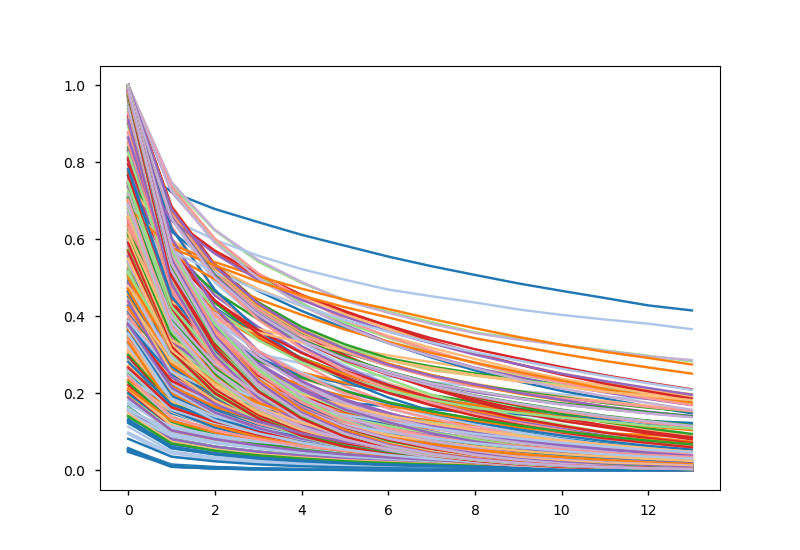

(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)
(3, 10, 14)


In [58]:
%matplotlib notebook
fig, ax = plt.subplots()
for k, setting in settings.items():
    colors = plt.cm.tab20(range(settings[k].nNodes))
    v = setting.data.squeeze()
    print(v.shape)
    for node in range(setting.nNodes):
        ax.plot(v[0, node], color = colors[node], label = node)
# ax.legend()
fig.show()

<IPython.core.display.Javascript object>


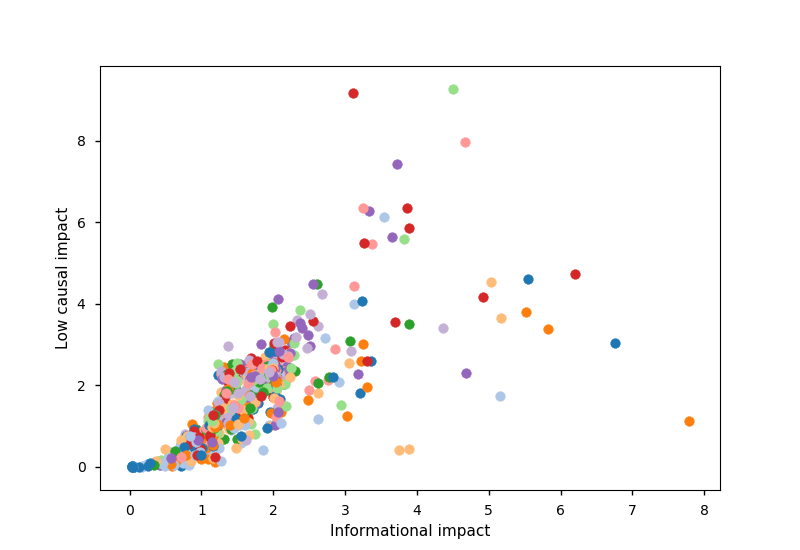

In [61]:
import matplotlib.pyplot as plt
II  = 'Informational impact'
LCI = 'Low causal impact'
HCI = 'High causal impact'
fig, ax = plt.subplots()
sets = [0, 1]
for k, v in aucs.items():
    v = v[sets].squeeze()
    colors = plt.cm.tab20(range(settings[k].nNodes))
    for node in range(settings[k].nNodes):
        ax.scatter(*v[...,node], color = colors[node], label = node)
ax.set(xlabel = II, ylabel = LCI)
# ax.legend()
fig.show()

(70, 3, 10) (70, 3, 10, 14)


<IPython.core.display.Javascript object>


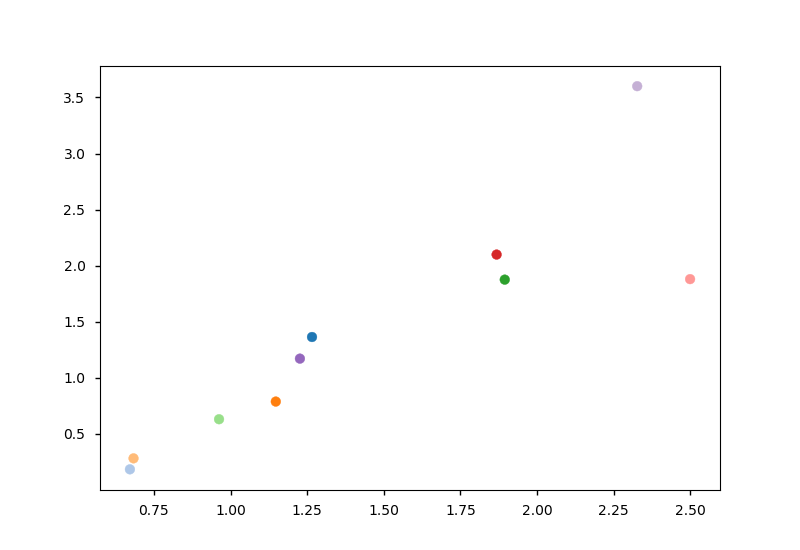

<IPython.core.display.Javascript object>


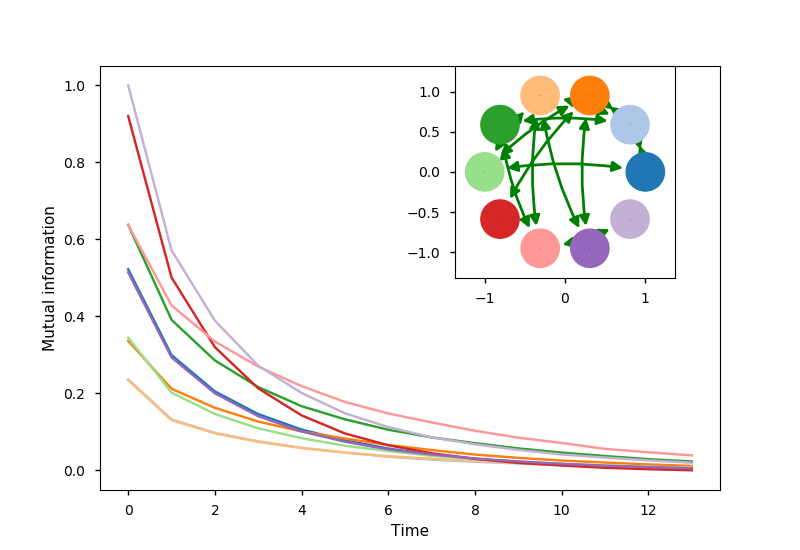

(14,)
(14,)
(14,)
(14,)
(14,)
(14,)
(14,)
(14,)
(14,)
(14,)
Using circular_layout


In [132]:
idx = np.argwhere(percentages[:, 0] == 0)
auci = np.array([i for i in aucs.values()]).squeeze()
mis  = np.array([i.data for i in settings.values()]).squeeze()

tmp = list(settings.items())
zdx = idx[0].squeeze()
# IO.savePickle(f'crap_graph{zdx}', nx.node_link_graph(tmp[zdx][1].graph))
print(auci.shape, mis.shape)
fig, ax = plt.subplots()
ax.scatter(*auci[zdx, sets], color = colors)
fig.show()

fig, ax = plt.subplots()
for i in range(10):
    y = mis[zdx, 0, i]
    print(y.shape)
    ax.plot(y, color = colors[i])
ax.set(xlabel = 'Time', ylabel = 'Mutual information')
inax = ax.inset_axes((0.5, 0.5, 0.5, 0.5))
import networkx as nx
plotz.addGraphPretty(nx.node_link_graph(tmp[zdx][1].graph), color = colors,  ax = inax)
fig.show()
